In [ ]:
### External Library Imports
# importing python data manipulation/visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# importing sklearn predictive analysis utilities
from sklearn.linear_model import LinearRegression , Lasso , Ridge , LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import r_regression

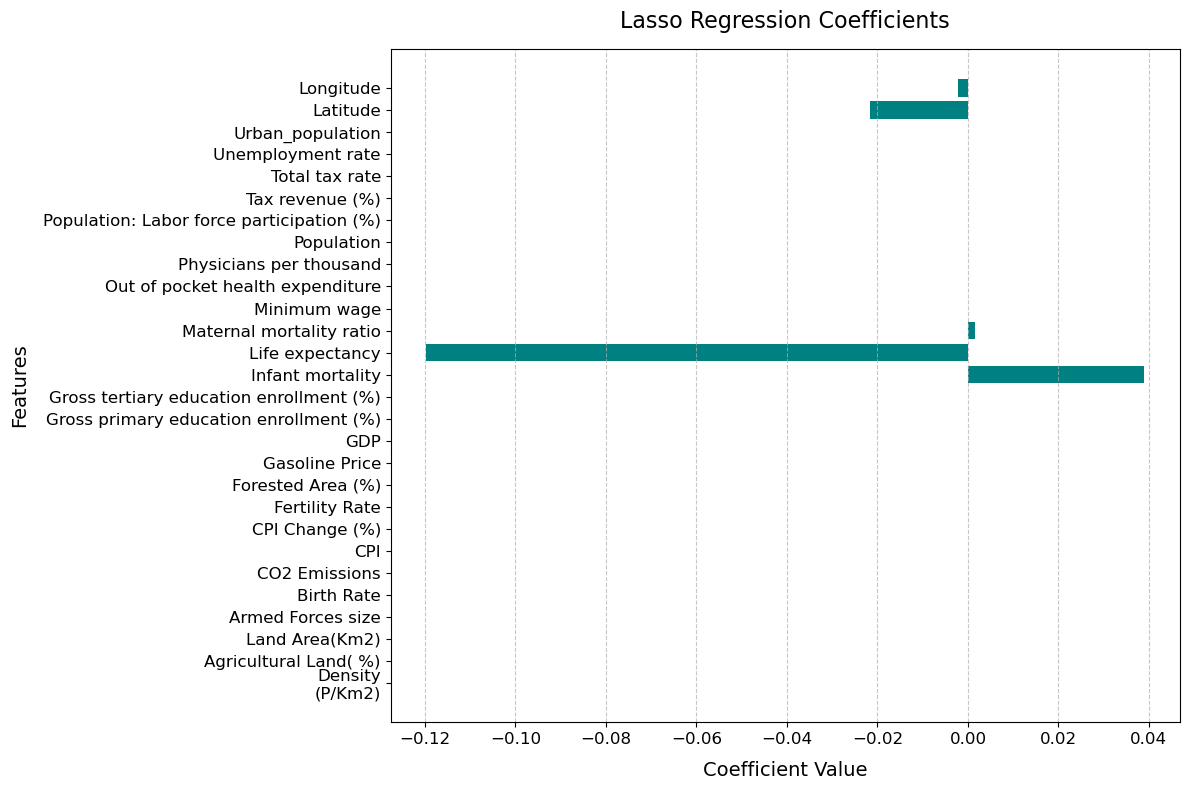

0.2759855


In [ ]:
### Data Preprocessing
# reading wildfire dataset from local csv file then filtering to only data from 2023
wildfire_df = pd.read_csv("share-of-the-total-land-area-burnt-by-wildfires-each-year.csv")
wildfire_df = wildfire_df[wildfire_df['Year'] == 2023]
wildfire_df = wildfire_df.drop("Year" , axis = 1)

# reading 2023 country data from local csv file
climate_df = pd.read_csv("world-data-2023.csv")

# matching rows from the datasets to filter out non-mergable data then merging the datasets on the country axis
wildfire_df = wildfire_df[wildfire_df['Country'].isin(climate_df['Country'])]
merged_df = pd.merge(wildfire_df, climate_df, on='Country')

# clean missing data by filling empty cells with the average value for that column
merged_df = merged_df.drop("Country", axis=1)
merged_df = merged_df.fillna(merged_df.median())


# old normalization code
# scaler = StandardScaler();
# normalized = pd.DataFrame(
#     scaler.fit_transform(merged_df),
#     columns=merged_df.columns,
#     index=merged_df.index
# )
# 
# scaler = RobustScaler();
# normalized = pd.DataFrame(
#     scaler.fit_transform(merged_df),
#     columns=merged_df.columns,
#     index=merged_df.index
# )
# 
# #merged_df = normalized

### Lasso Regression Analysis of Feature
## Analysis
# initialize feature and target variables then split into testing and training sets
X = merged_df.drop("Annual share of the total land area burnt by wildfires", axis = 1)
y = merged_df["Annual share of the total land area burnt by wildfires"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1)

# instantiate Lasso regression model then mount training data and acquire initial predictions
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_
y_pred = lasso.predict(X_test)

## Visualization
plt.figure(figsize=(12, 8))

# horizontal bar plot
plt.barh(X.columns, lasso_coef, color='teal')

# add labels and title
plt.xlabel('Coefficient Value', fontsize=14, labelpad=10)
plt.ylabel('Features', fontsize=14, labelpad=10)
plt.title('Lasso Regression Coefficients', fontsize=16, pad=15)

# optional: Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# rotate the feature names for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# show the figure
plt.tight_layout()
plt.show()


C:\Users\Andrew\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.71605e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


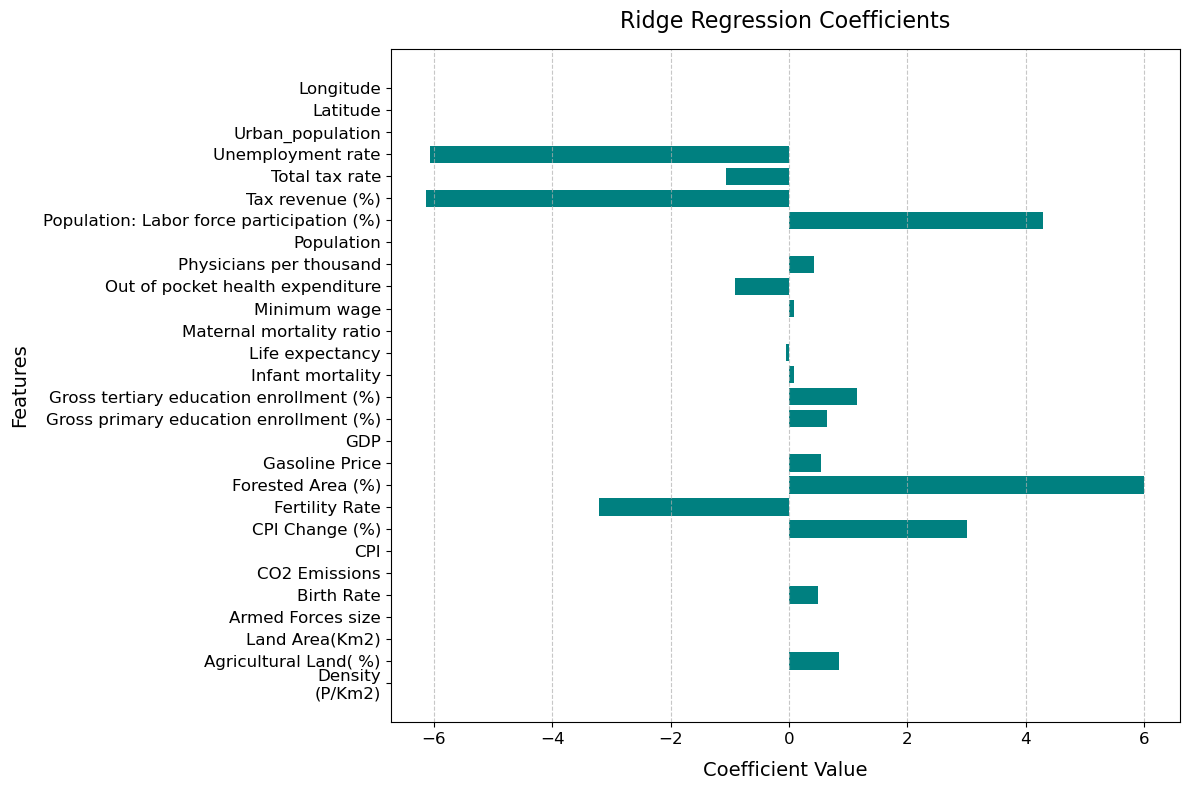

In [ ]:
### Ridge Regression
## Analysis
# instantiate Ridge regression model then mount training data and acquire initial predictions
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge_coef = ridge.coef_
y_pred = ridge.predict(X_test)

## Visualization
plt.figure(figsize=(12, 8))

# horizontal bar plot
plt.barh(X.columns, ridge_coef, color='teal')

# add labels and title
plt.xlabel('Coefficient Value', fontsize=14, labelpad=10)
plt.ylabel('Features', fontsize=14, labelpad=10)
plt.title('Ridge Regression Coefficients', fontsize=16, pad=15)

# add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# rotate the feature names for better readability (optional)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# show the figure
plt.tight_layout()
plt.show()


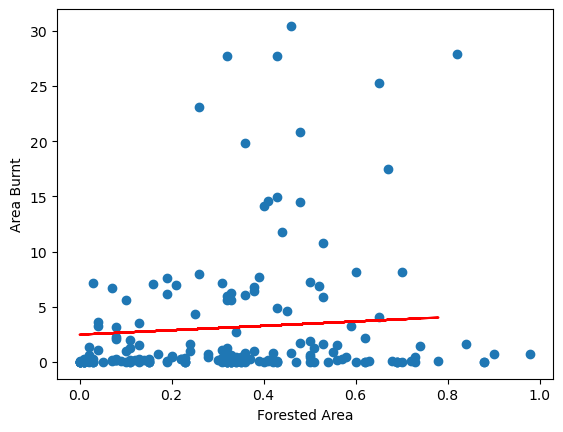

-0.05288641829583507
Index(['Annual share of the total land area burnt by wildfires',
       'Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'CO2 Emissions', 'CPI',
       'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


In [ ]:
### Feature Investigation
## Forested Area
# redefine feature set to only include forested area then recreate training and testing sets
X = merged_df["Forested Area (%)"].values.reshape(-1,1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

# instantiate Lasso regression model then mount training data and acquire predictions
reg = Lasso(alpha = 0.3)
reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)

## Visualization
# scatter plot of data points
plt.scatter(X , y)

# add lasso regression line
plt.plot(X_test , y_pred , color = 'r')

# add labels
plt.xlabel("Forested Area")
plt.ylabel("Area Burnt")

# show the figure
plt.show()

# print R^2 value for this regression
print(reg.score(X_test, y_test))

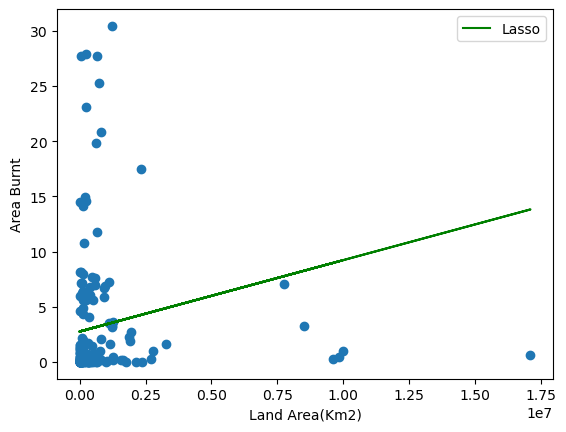

-0.3255000165897164


In [ ]:
## Land Area
# redefine feature set to only include total land area then recreate training and testing sets
X = merged_df["Land Area(Km2)"].values.reshape(-1,1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

# instantiate Lasso regression model then mount training data and acquire predictions
reg2 = Lasso(alpha = 0.3)
reg2.fit(X_train , y_train)
y_pred2 = reg2.predict(X_test)

## Visualization
# scatter plot of data points
plt.scatter(X, y)

# add lasso regression line
plt.plot(X_test , y_pred2 , color = 'g', label="Lasso")

# add labels and legend
plt.xlabel("Land Area(Km2)")
plt.ylabel("Area Burnt")
plt.legend()

# show the figure
plt.show()

# print R^2 value for this regression
print(reg2.score(X_test, y_test))

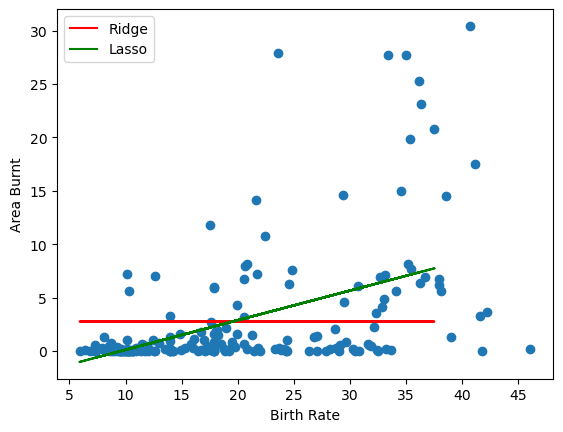

0.37465282374816367
0.37361430536924845


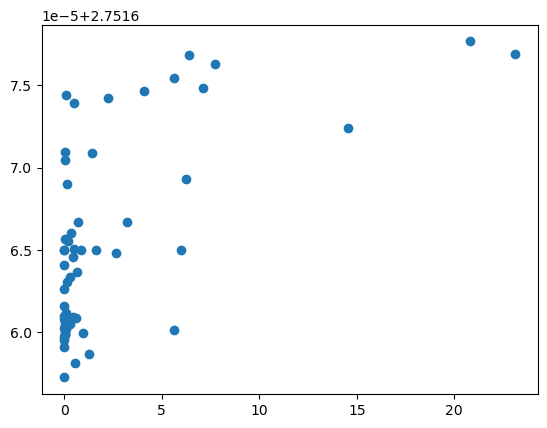

In [ ]:
## Birth Rate
# redefine feature set to only include total birth rate then recreate training and testing sets
X = merged_df["Birth Rate"].values.reshape(-1,1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

# instantiate Lasso and Ridge regression models then mount training data and acquire predictions
reg1 = Ridge(alpha = 0.3)
reg1.fit(X_train , y_train)
y_pred1 = reg2.predict(X_test)

reg2 = Lasso(alpha = 0.3)
reg2.fit(X_train , y_train)
y_pred2 = reg2.predict(X_test)

## Visualization
# scatter plot of data points
plt.scatter(X, y)

# add Ridge and lasso regression line
plt.plot(X_test , y_pred1 , color = 'r', label="Ridge")
plt.plot(X_test , y_pred2 , color = 'g', label="Lasso")

# add labels and legend
plt.xlabel("Birth Rate")
plt.ylabel("Area Burnt")
plt.legend()

# show the figure
plt.show()

# scatter plot comparing predicted vs actual values
plt.scatter(y_test, y_pred1)

# print R^2 values for these regressions
print(reg1.score(X_test, y_test))
print(reg2.score(X_test, y_test))

In [ ]:
# define a function for automatically performing a linear regression on a provided feature and displaying a visualization 
def genGraph(feature):

    # redefine feature set to only include the feature provided via argument then recreate training and testing sets
    X = merged_df[feature].values.reshape(-1,1)
    X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)
    
    # instantiate Linear regression model then mount training data and acquire predictions
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    # print R^2 value for this regression
    print(f"R^2 Value: {reg.score(X_test, y_test)}")
    
    # add regression line onto scatter plot of relevant data points then display the figure
    plt.scatter(X, y)
    plt.plot(X_test, y_pred, color='r', label="Linear Regression")
    plt.legend()
    plt.show()


feature name: Density
(P/Km2)
R^2 Value: -5.104388863526334


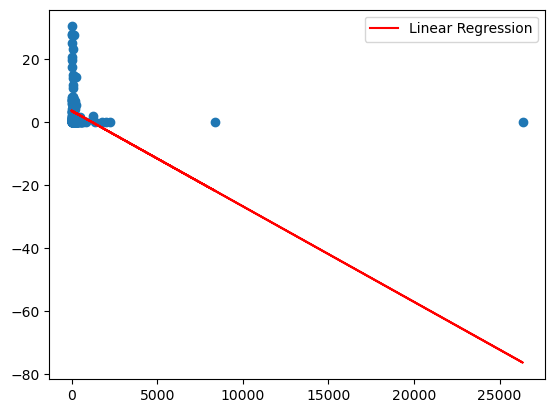

feature name: Agricultural Land( %)
R^2 Value: -0.08317817307261621


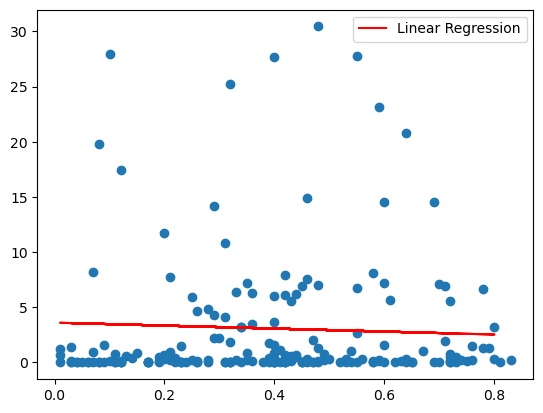

feature name: Land Area(Km2)
R^2 Value: -0.32550020157248616


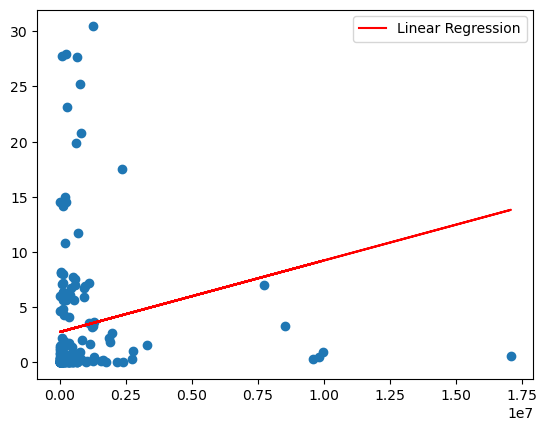

feature name: Armed Forces size
R^2 Value: -0.015378675809475384


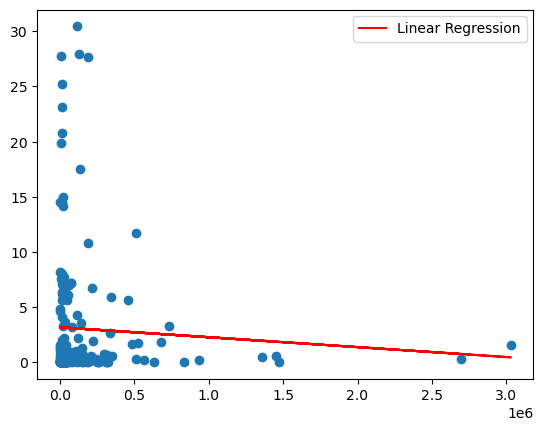

feature name: Birth Rate
R^2 Value: 0.37465492430365854


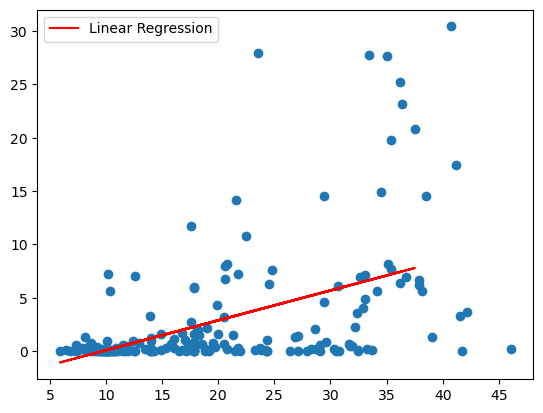

feature name: CO2 Emissions
R^2 Value: -2.82754021733363


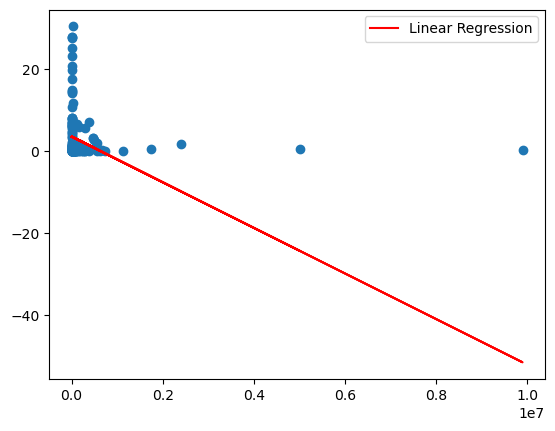

feature name: CPI
R^2 Value: -0.01537847476193921


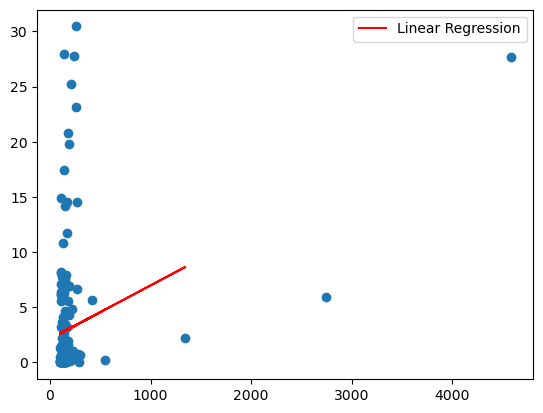

feature name: CPI Change (%)
R^2 Value: -0.016471769444253992


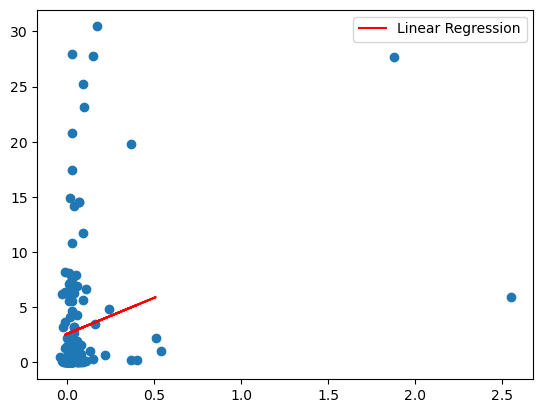

feature name: Fertility Rate
R^2 Value: 0.3628290931978746


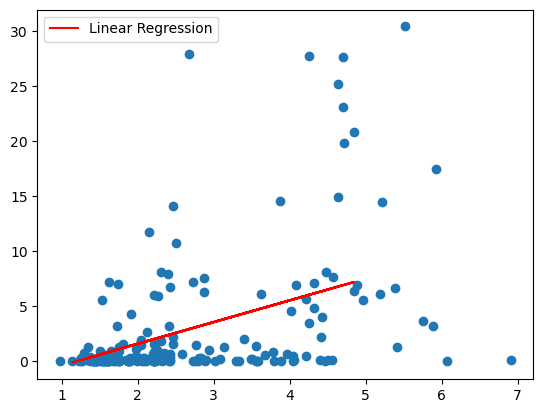

feature name: Forested Area (%)
R^2 Value: -0.1693282402030838


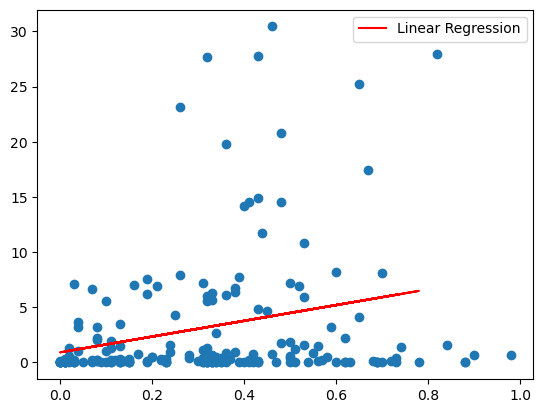

feature name: Gasoline Price
R^2 Value: -0.02162904080346295


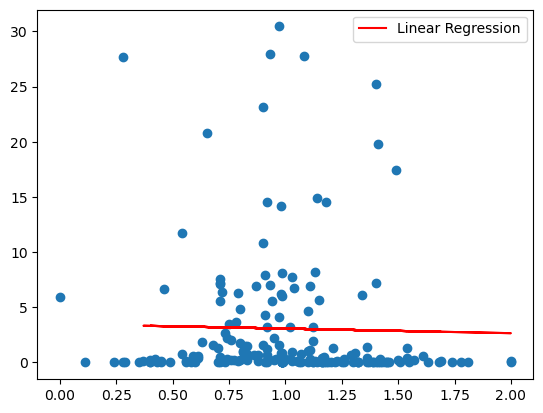

feature name: GDP
R^2 Value: -0.5660955279672719


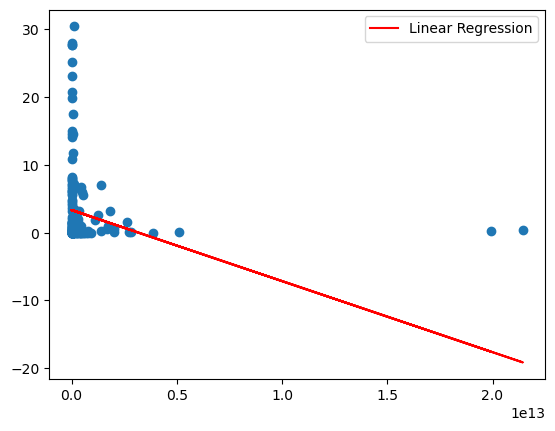

feature name: Gross primary education enrollment (%)
R^2 Value: -0.03788820227259948


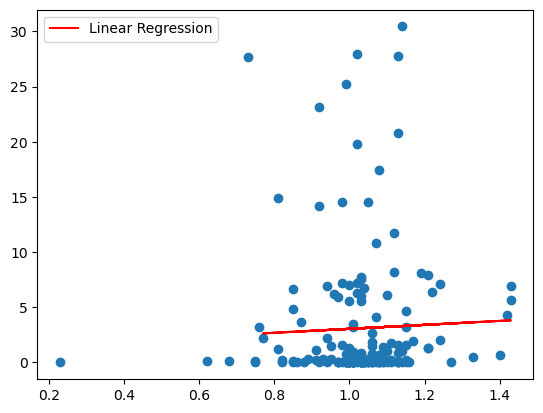

feature name: Gross tertiary education enrollment (%)
R^2 Value: 0.1993257404353257


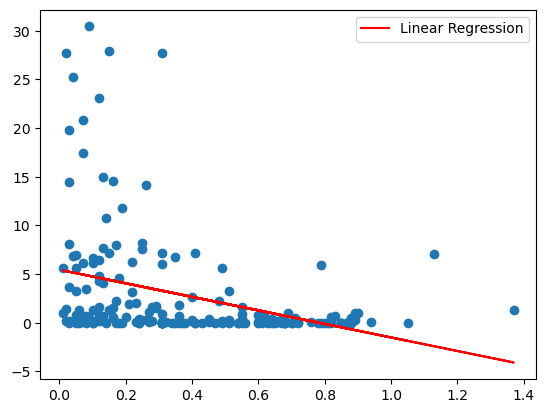

feature name: Infant mortality
R^2 Value: 0.49268668930142057


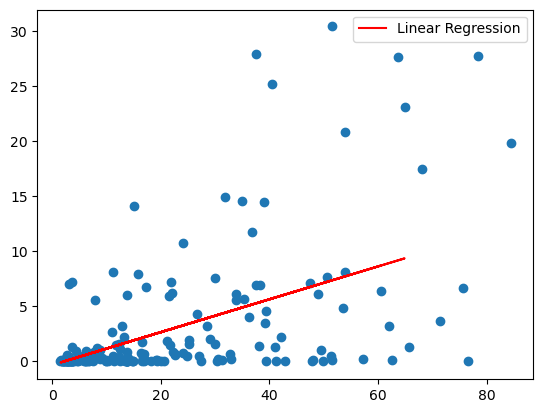

feature name: Life expectancy
R^2 Value: 0.38173199169754424


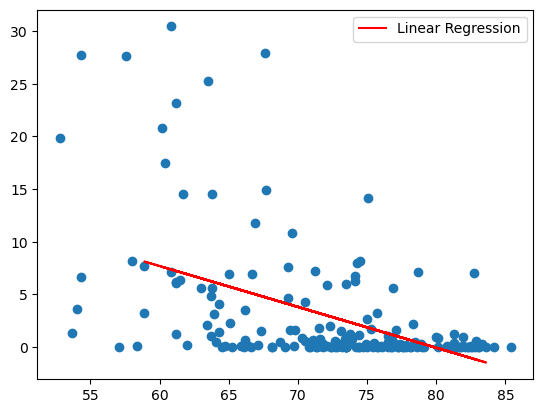

feature name: Maternal mortality ratio
R^2 Value: 0.3952177175342406


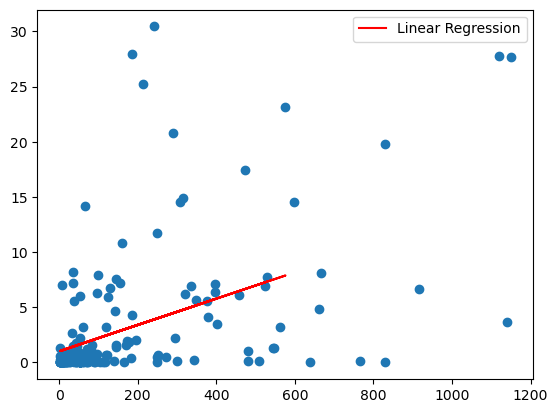

feature name: Minimum wage
R^2 Value: 0.006724843152769444


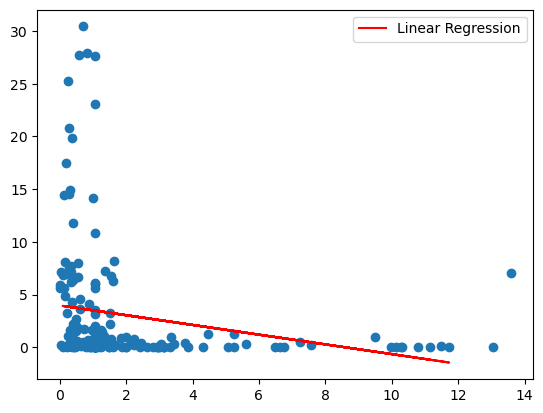

feature name: Out of pocket health expenditure
R^2 Value: -0.008129916723706554


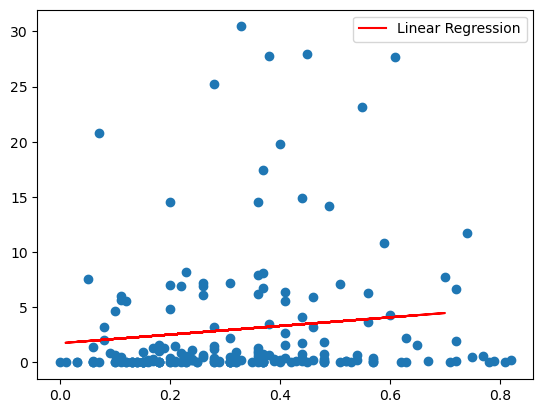

feature name: Physicians per thousand
R^2 Value: 0.16679119781736618


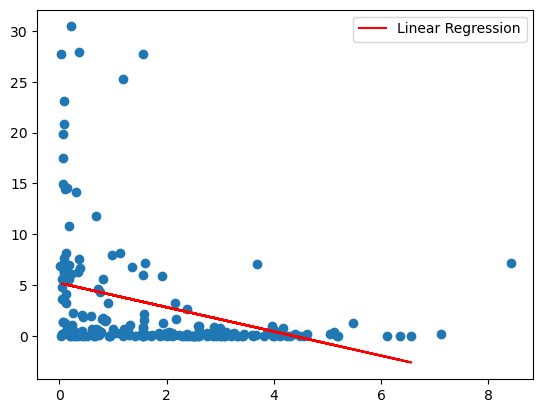

feature name: Population
R^2 Value: -0.09599771021941939


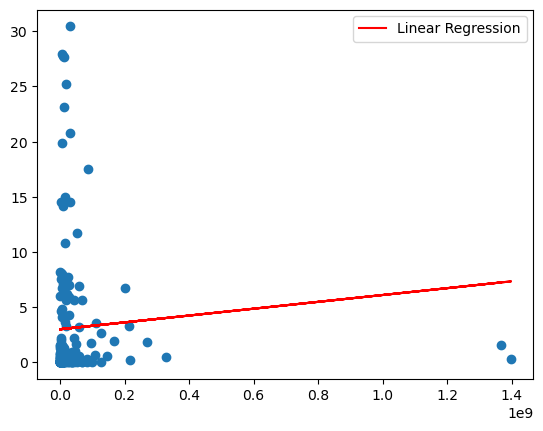

feature name: Population: Labor force participation (%)
R^2 Value: 0.03432068149359857


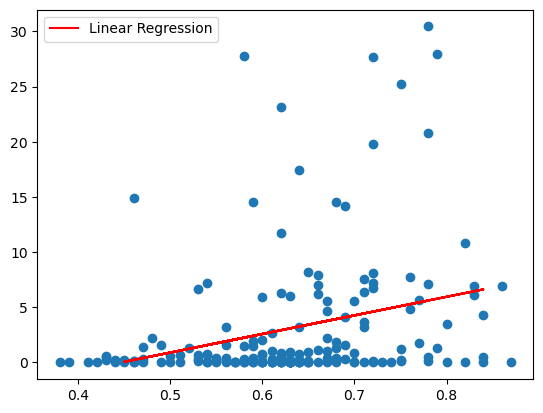

feature name: Tax revenue (%)
R^2 Value: 0.1020040641415153


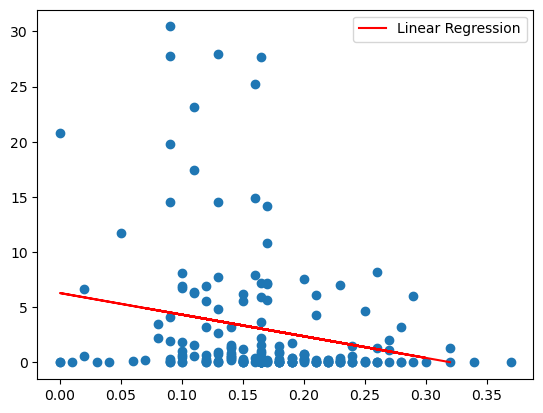

feature name: Total tax rate
R^2 Value: -0.035859842194744695


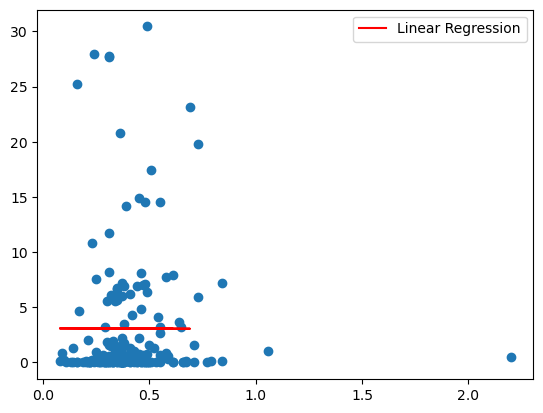

feature name: Unemployment rate
R^2 Value: -0.012300547439695553


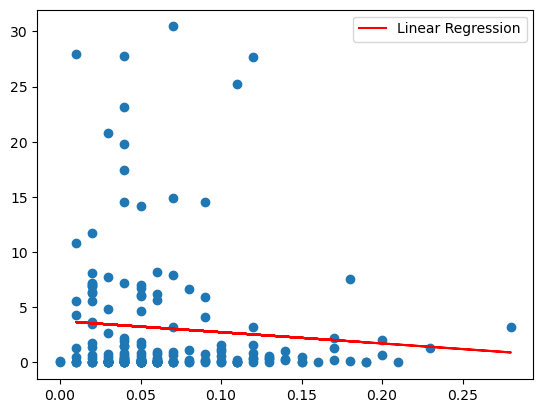

feature name: Urban_population
R^2 Value: -0.024073481410552988


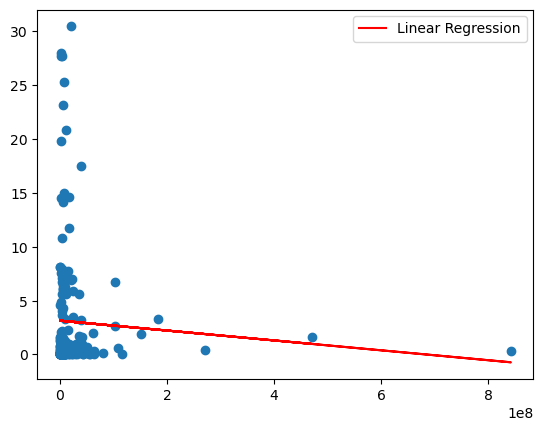

feature name: Latitude
R^2 Value: 0.1610562594418795


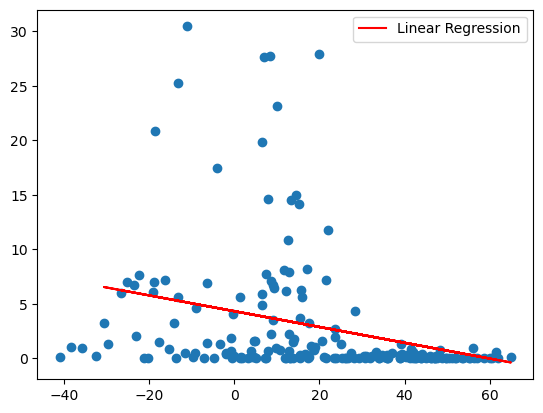

feature name: Longitude
R^2 Value: -0.029396850376944172


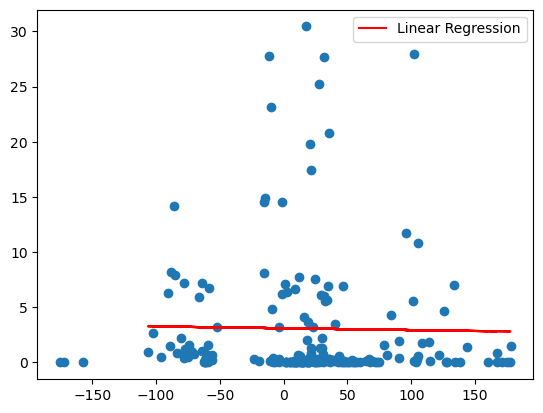

In [ ]:
# loop through all feature columns and generate a linear regression figure using the above function
for feature in merged_df.columns[1:]:
    print(f"feature name: {feature}")
    genGraph(feature)

In [ ]:
# define a function for automatically performing a linear regression on a provided feature and returning the R^2 value
def genR2(feature):
    
    # redefine feature set to only include the feature provided via argument then recreate training and testing sets
    X = merged_df[feature].values.reshape(-1,1)
    X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)
    
    # instantiate Linear regression model then mount training data and acquire predictions
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    # return the R^2 score for this regression
    return reg.score(X_test, y_test)

R^2: 0.49268668930142057, Feature: Infant mortality
R^2: 0.3952177175342406, Feature: Maternal mortality ratio
R^2: 0.38173199169754424, Feature: Life expectancy
R^2: 0.37465492430365854, Feature: Birth Rate
R^2: 0.3628290931978746, Feature: Fertility Rate
R^2: 0.1993257404353257, Feature: Gross tertiary education enrollment (%)
R^2: 0.16679119781736618, Feature: Physicians per thousand
R^2: 0.1610562594418795, Feature: Latitude
R^2: 0.1020040641415153, Feature: Tax revenue (%)
R^2: 0.03432068149359857, Feature: Population: Labor force participation (%)
R^2: 0.006724843152769444, Feature: Minimum wage
R^2: -0.008129916723706554, Feature: Out of pocket health expenditure
R^2: -0.012300547439695553, Feature: Unemployment rate
R^2: -0.01537847476193921, Feature: CPI
R^2: -0.015378675809475384, Feature: Armed Forces size
R^2: -0.016471769444253992, Feature: CPI Change (%)
R^2: -0.02162904080346295, Feature: Gasoline Price
R^2: -0.024073481410552988, Feature: Urban_population
R^2: -0.029396

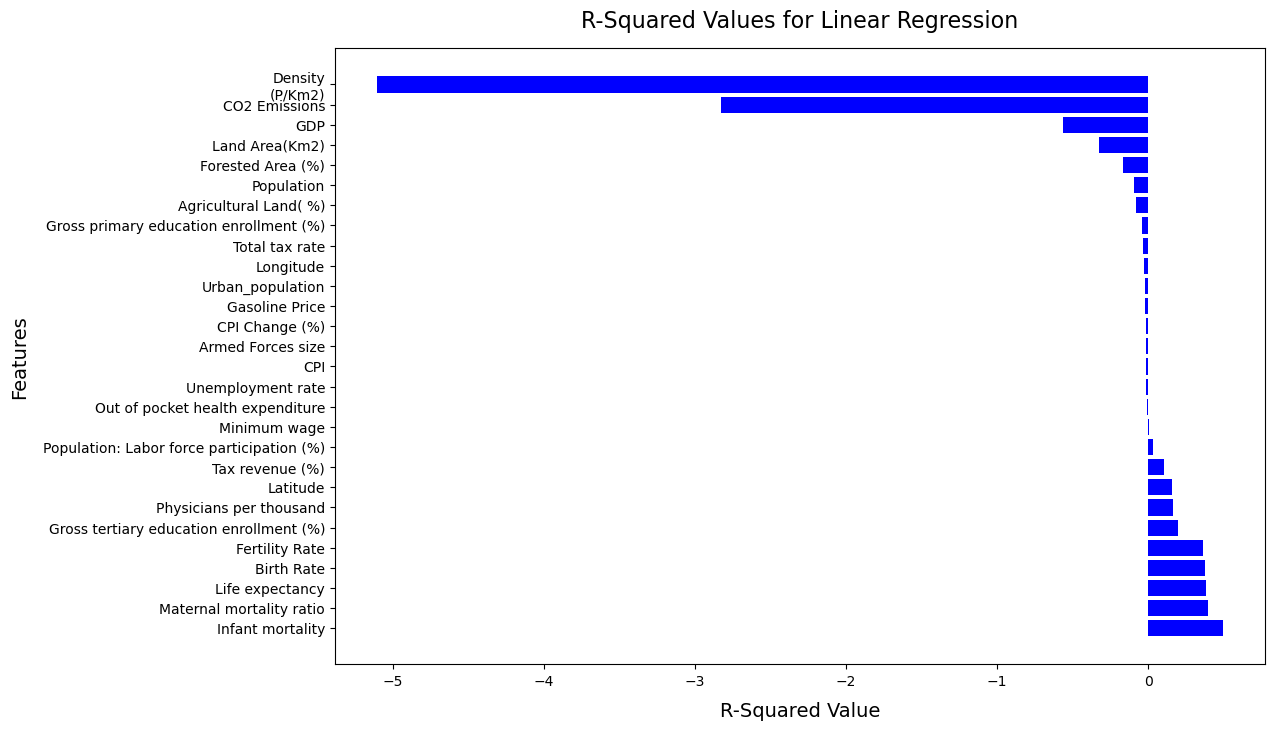

In [ ]:
# declare a dictionary for R^2 scores and populate by looping over each of the features and passing them into the above function
# (the keys are the R^2 scores and the values are the feature names)
r2Scores = {}
for feature in merged_df.columns[1:]:
    r2Scores[genR2(feature)] = feature

# sort and print the R^2 scores in descending order
sortedKeys = sorted(r2Scores.keys(), reverse=True)
for key in sortedKeys:
    print(f"R^2: {key}, Feature: {r2Scores[key]}")


plt.figure(figsize=(12, 8))

# add horizontal bar graph
plt.barh([r2Scores[e] for e in sortedKeys], r2s, color='b')

# add labels and title
plt.xlabel('R-Squared Value', fontsize=14, labelpad=10)
plt.ylabel('Features', fontsize=14, labelpad=10)
plt.title('R-Squared Values for Linear Regression', fontsize=16, pad=15)

# display the figure
plt.show()

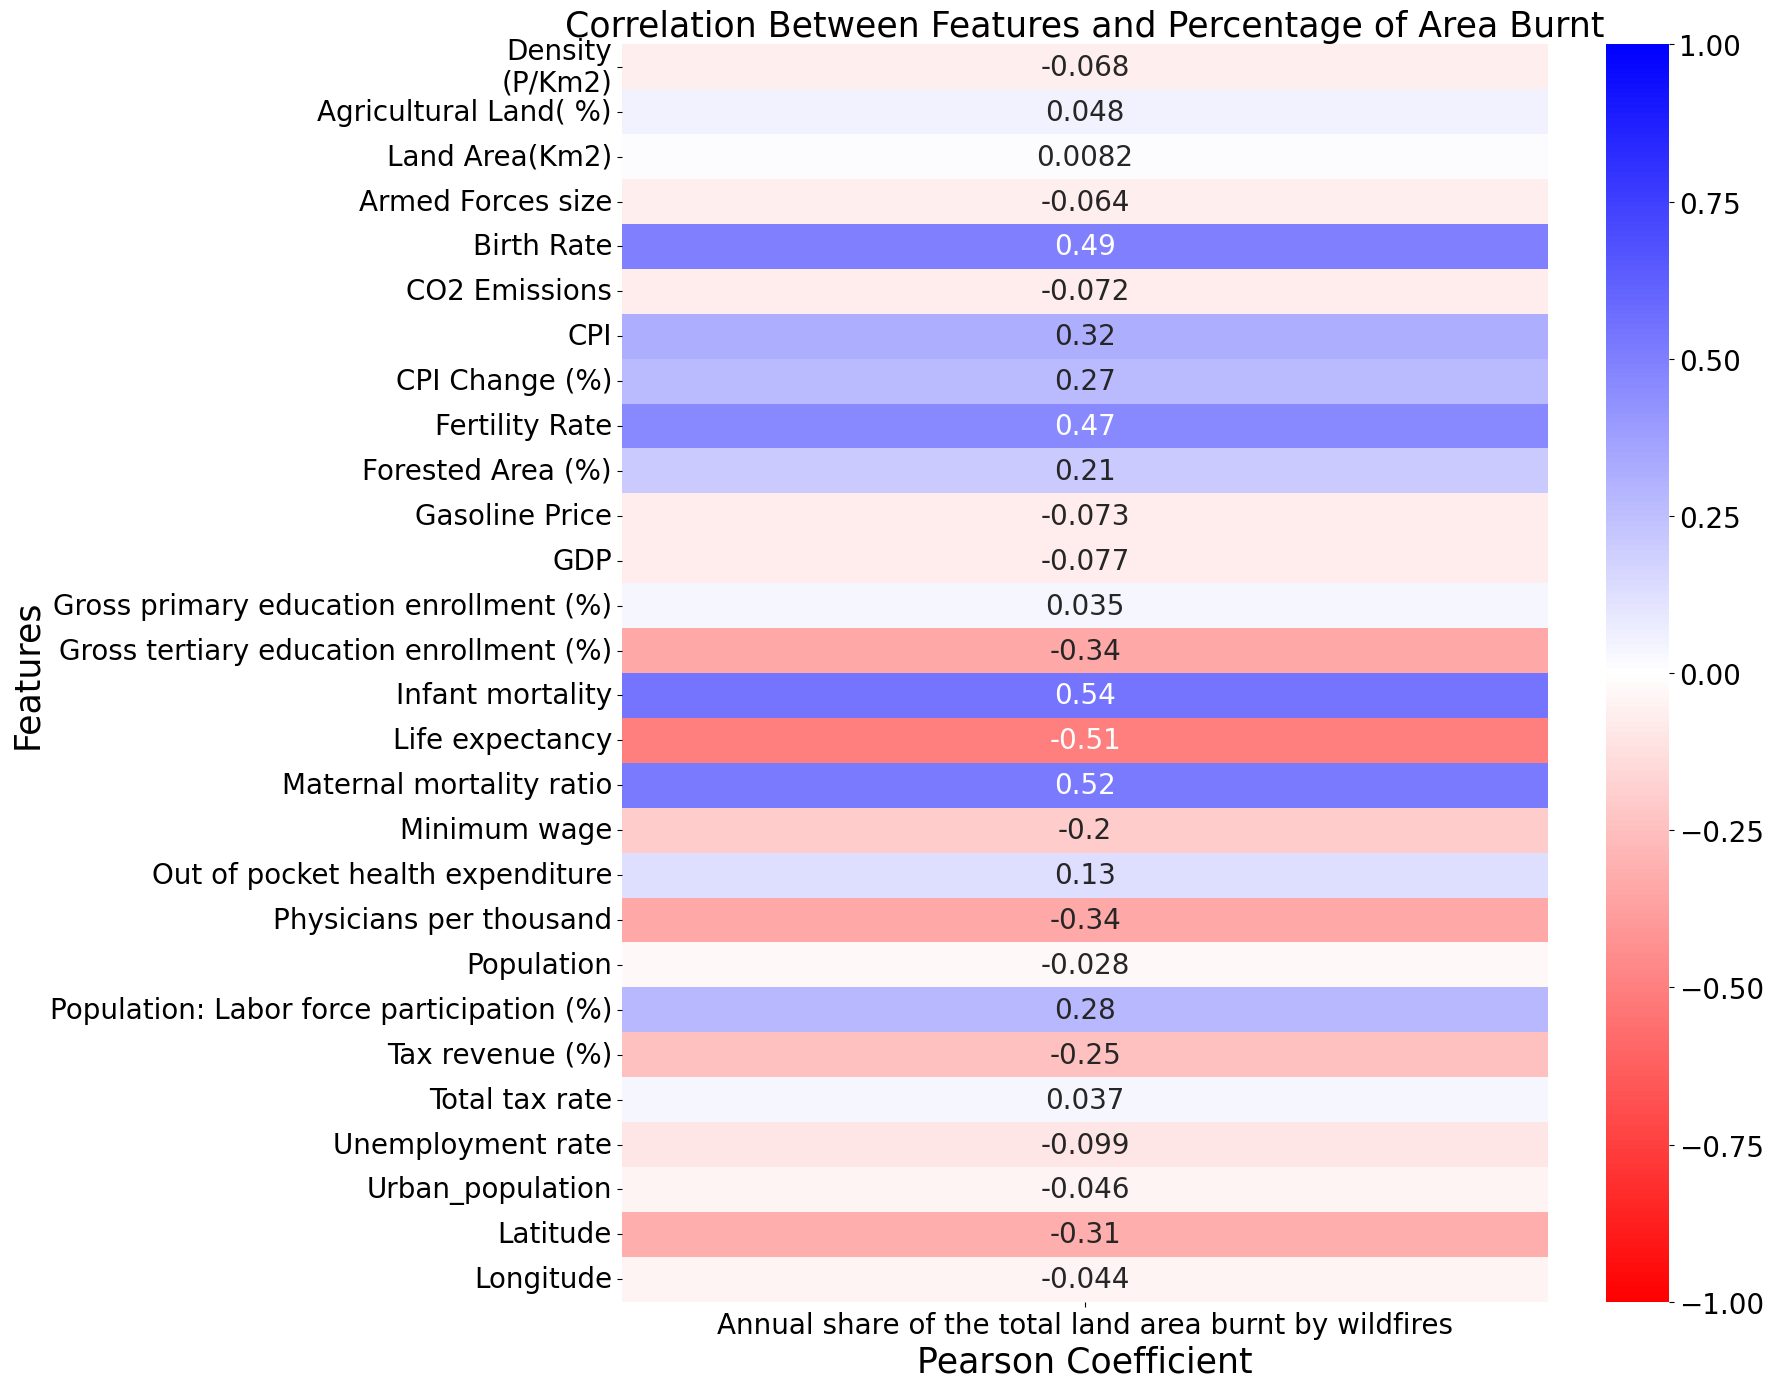

In [ ]:
# calculate the Pearson correlation between each feature and the target variable
target_column = "Annual share of the total land area burnt by wildfires"
correlations_with_target = merged_df.corr()[target_column].drop(target_column)

# create a custom colored colormap for the heatmap figure
blue_to_red = mcolors.LinearSegmentedColormap.from_list(
"blue_to_red", ["red", "white", "blue"], N=256
)

# create seaborn heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(
correlations_with_target.to_frame(),
annot=True,
vmin=-1, vmax=1,
cmap=blue_to_red,
annot_kws={"size": 20} ,
)

# getting the scale bar object so we can adjust the size
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# add labels and title
plt.title('Correlation Between Features and Percentage of Area Burnt', fontsize=25)
plt.xlabel('Pearson Coefficient' , fontsize=25)
plt.ylabel('Features', fontsize=25)

# display the heatmap
plt.tight_layout()
plt.show() 
